In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [225]:
data=pd.read_csv('abalone.csv')

In [226]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [227]:
data.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [228]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [229]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


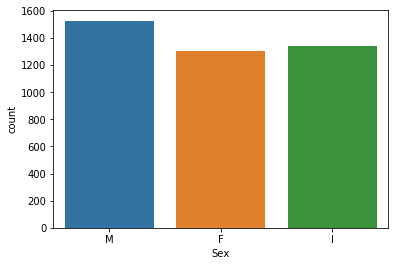

In [231]:
sns.countplot(data.Sex)

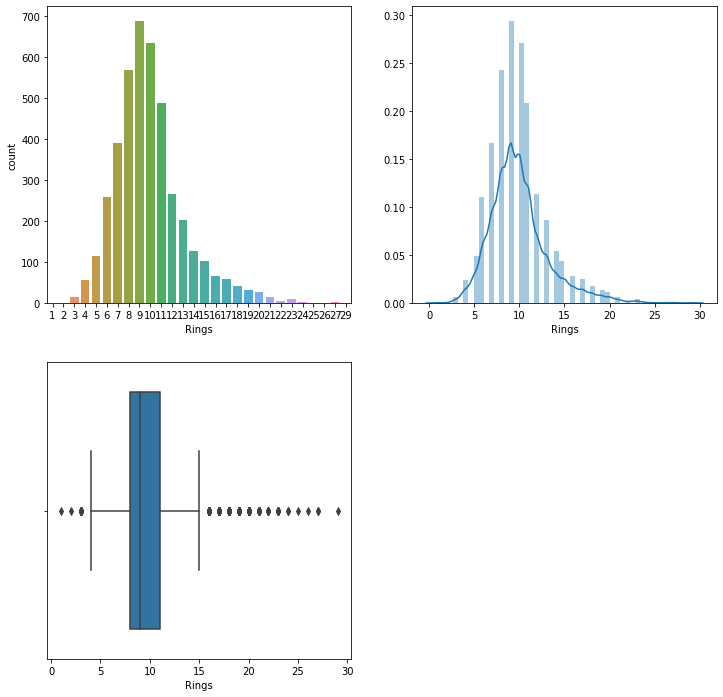

In [232]:
#checking skewed
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.countplot(data.Rings)
plt.subplot(2,2,2)
sns.distplot(data.Rings)
plt.subplot(2,2,3)
sns.boxplot(data.Rings)

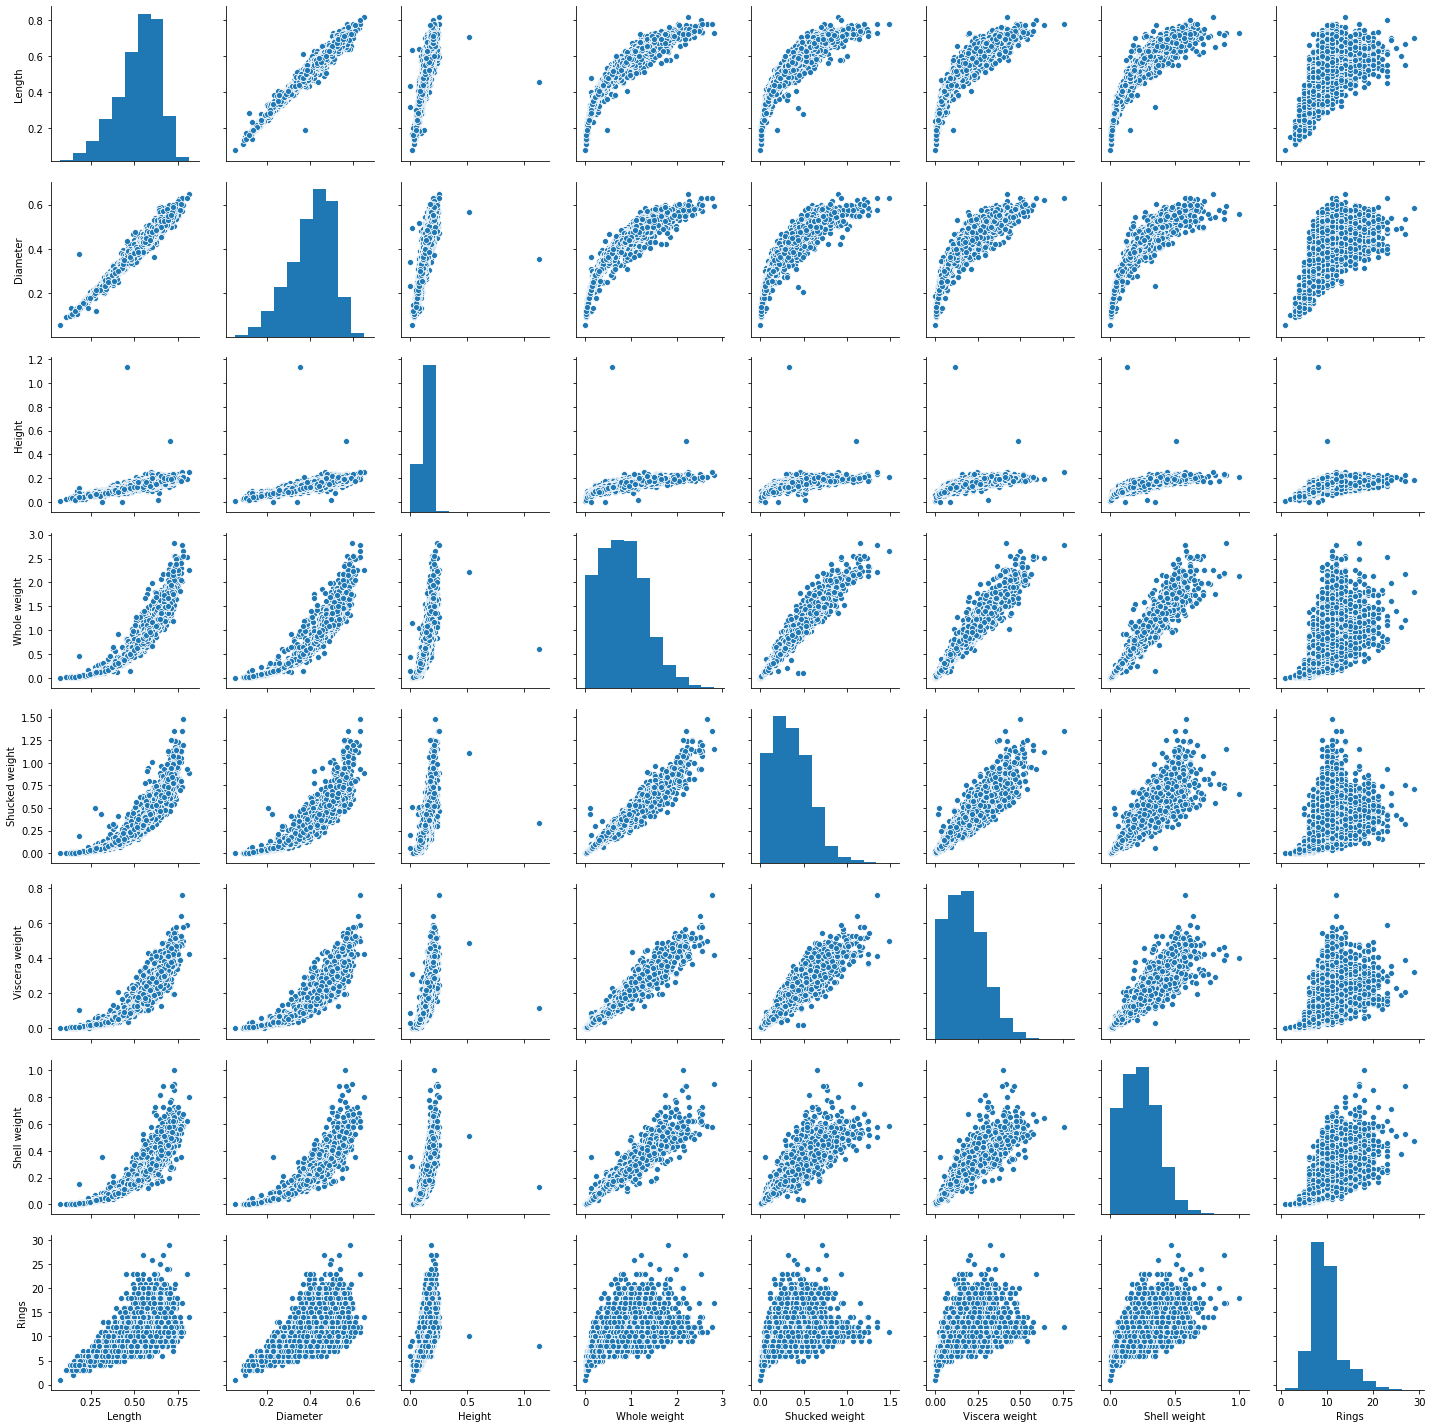

In [233]:
sns.pairplot(data)

In [234]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


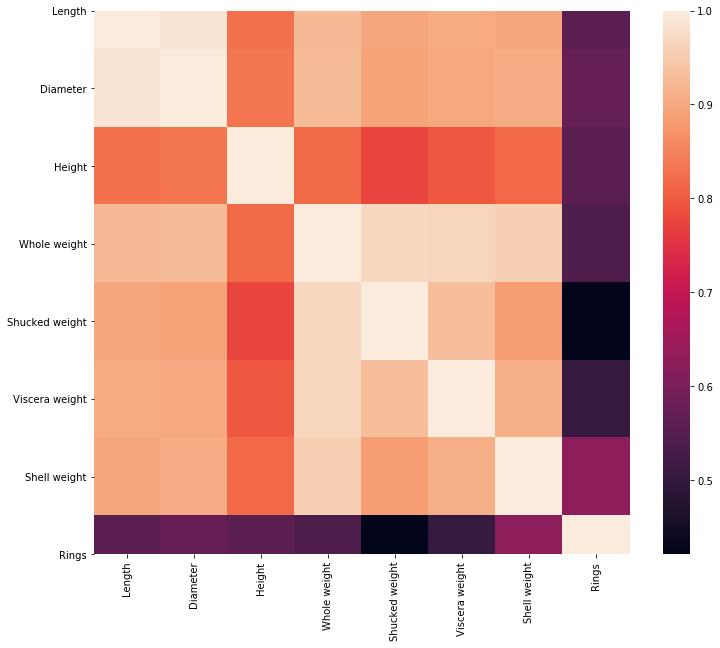

In [235]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

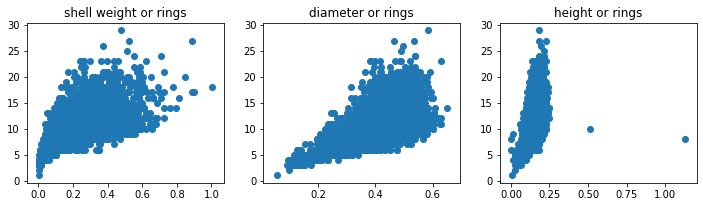

In [236]:
plt.figure(figsize=(12,10))
plt.subplot(3,3,1)
plt.title('shell weight or rings')
plt.scatter(data['Shell weight'],data['Rings'])
plt.subplot(3,3,2)
plt.title('diameter or rings')
plt.scatter(data['Diameter'],data['Rings'])
plt.subplot(3,3,3)
plt.title('height or rings')
plt.scatter(data['Height'],data['Rings'])

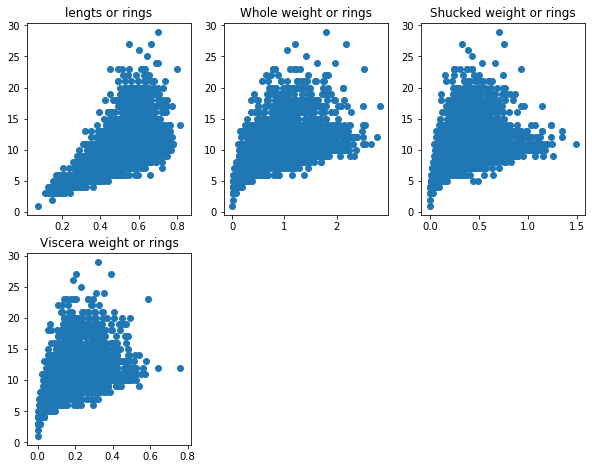

In [237]:
plt.figure(figsize=(10,12))
plt.subplot(3,3,1)
plt.title('lengts or rings')
plt.scatter(data['Length'],data['Rings'])
plt.subplot(3,3,2)
plt.title('Whole weight or rings')
plt.scatter(data['Whole weight'],data['Rings'])
plt.subplot(3,3,3)
plt.title('Shucked weight or rings')
plt.scatter(data['Shucked weight'],data['Rings'])
plt.subplot(3,3,4)
plt.title('Viscera weight or rings')
plt.scatter(data['Viscera weight'],data['Rings'])


In [238]:
#the data we have at disposal is great for predicting the Rings between 4 to 17 years.

In [239]:
new_data = data[data.Rings < 18]
new_data = new_data[new_data.Rings > 3]


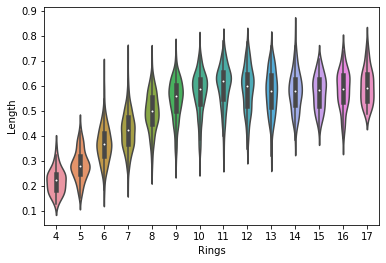

In [240]:
sns.violinplot(data=new_data,x='Rings',y='Length')

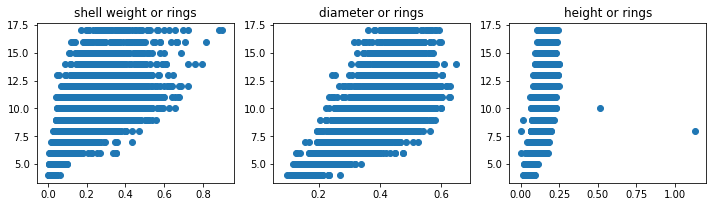

In [241]:
plt.figure(figsize=(12,10))
plt.subplot(3,3,1)
plt.title('shell weight or rings')
plt.scatter(new_data['Shell weight'],new_data['Rings'])
plt.subplot(3,3,2)
plt.title('diameter or rings')
plt.scatter(new_data['Diameter'],new_data['Rings'])
plt.subplot(3,3,3)
plt.title('height or rings')
plt.scatter(new_data['Height'],new_data['Rings'])

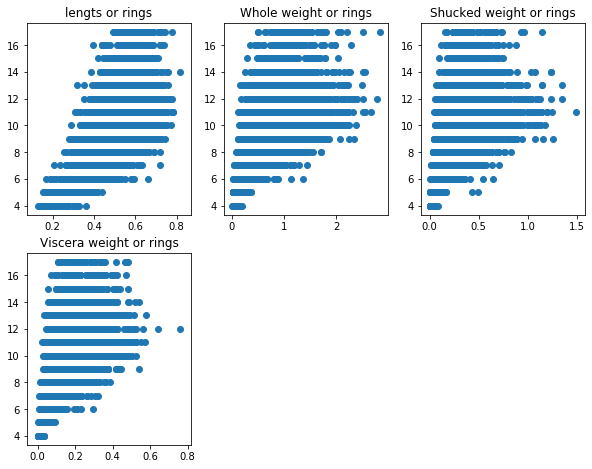

In [242]:
plt.figure(figsize=(10,12))
plt.subplot(3,3,1)
plt.title('lengts or rings')
plt.scatter(new_data['Length'],new_data['Rings'])
plt.subplot(3,3,2)
plt.title('Whole weight or rings')
plt.scatter(new_data['Whole weight'],new_data['Rings'])
plt.subplot(3,3,3)
plt.title('Shucked weight or rings')
plt.scatter(new_data['Shucked weight'],new_data['Rings'])
plt.subplot(3,3,4)
plt.title('Viscera weight or rings')
plt.scatter(new_data['Viscera weight'],new_data['Rings'])


In [243]:
#removing outlire
data=new_data[new_data.Height<0.5]

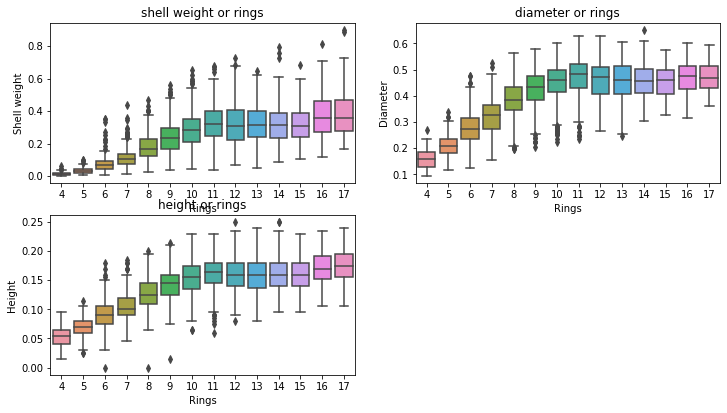

In [244]:
plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
plt.title('shell weight or rings')
sns.boxplot(data=data,x='Rings',y='Shell weight')
plt.subplot(3,2,2)
plt.title('diameter or rings')
sns.boxplot(data=data,x='Rings',y='Diameter')
plt.subplot(3,2,3)
plt.title('height or rings')
sns.boxplot(data=data,x='Rings',y='Height')


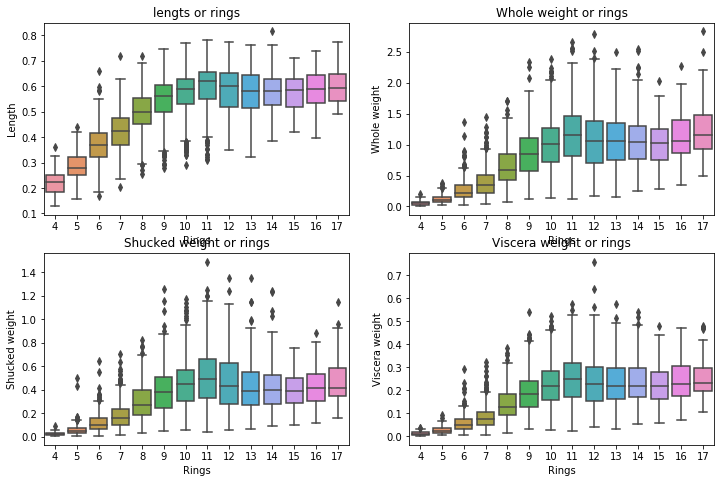

In [245]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.title('lengts or rings')
sns.boxplot(data=data,x='Rings',y='Length')
plt.subplot(3,2,2)
plt.title('Whole weight or rings')
sns.boxplot(data=data,x='Rings',y='Whole weight')
plt.subplot(3,2,3)
plt.title('Shucked weight or rings')
sns.boxplot(data=data,x='Rings',y='Shucked weight')
plt.subplot(3,2,4)
plt.title('Viscera weight or rings')
sns.boxplot(data=data,x='Rings',y='Viscera weight')

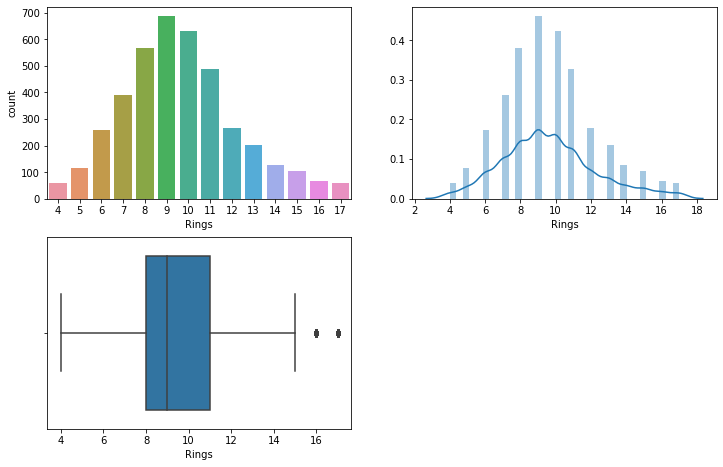

In [246]:
#again checking skewed
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
sns.countplot(data.Rings)
plt.subplot(3,2,2)
sns.distplot(data.Rings)
plt.subplot(3,2,3)
sns.boxplot(data.Rings)

In [247]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [248]:
new_col=pd.get_dummies(data.Sex)
data[new_col.columns]=new_col

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [249]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'F', 'I', 'M'],
      dtype='object')

In [250]:
x=data.drop(['Sex','Rings'],axis=1)
y=data.Rings

In [251]:
convert=StandardScaler()
x=convert.fit_transform(x)

In [252]:
x.shape,y.shape

((4022, 10), (4022,))

In [253]:
#Split the x and y variables
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

In [254]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 23, test_size = 0.2)

In [255]:
# LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
r2_score(y_train, lr.predict(x_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.3753422604887453

In [256]:
r2_score(y_test, lr.predict(x_test)) 

0.31224831884878346

In [257]:
#RandomForestRegressor
random_model = RandomForestRegressor()
random_model.fit(x_train, y_train)
r2_score(y_train, random_model.predict(x_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9175900382123396

In [258]:
r2_score(y_test, random_model.predict(x_test)) 

0.47619160894413126

In [259]:
#DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
r2_score(y_train, decision_tree.predict(x_train))
# over fiting

1.0

In [260]:
r2_score(y_test, decision_tree.predict(x_test)) 

0.1657537140330574

In [261]:
#KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(x_train,y_train)
r2_score(y_train, KN.predict(x_train))


0.3803461943166059

In [262]:
r2_score(y_test, KN.predict(x_test)) 

0.20937082627090542

In [263]:
#GaussianNB
Gaussian = GaussianNB()
Gaussian.fit(x_train,y_train)
r2_score(y_train, Gaussian.predict(x_train))


0.19133795692390942

In [264]:
r2_score(y_test, Gaussian.predict(x_test)) 

0.13538737006999857

In [265]:
#SVC
svc = SVC()
svc.fit(x_train,y_train)
r2_score(y_train, svc.predict(x_train))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.35962815250300795

In [266]:
r2_score(y_test, svc.predict(x_test)) 

0.28648293609224873

In [ ]:
print('LogistRegression: ',r2_score(y_train, lr.predict(x_train)) )
print('Random Forest:', r2_score(y_train, random_model.predict(x_train)))
print('Decision Tree: ',r2_score(y_train, decision_tree.predict(x_train)))
print('KNeighbors:',r2_score(y_train, KN.predict(x_train)))
print('GaussianNB:',r2_score(y_train, Gaussian.predict(x_train)))
print('SVC:',r2_score(y_train, svc.predict(x_train)))


LogistRegression:  0.3753422604887453
Random Forest: 0.9175900382123396
Decision Tree:  1.0
KNeighbors: 0.3803461943166059
GaussianNB: 0.19133795692390942


In [223]:
##saving the model for feature prediction
from sklearn.externals import joblib

joblib.dump(random_model, 'abalone_project3.pk1')


['abalone_project3.pk1']